In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
%matplotlib inline

Using TensorFlow backend.


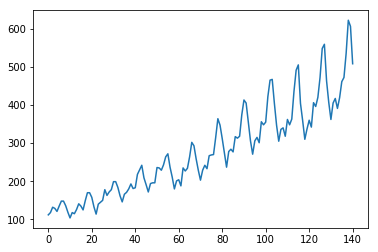

In [2]:
# load the dataset
dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
# 将整型变为float
dataset = dataset.astype('float32')

plt.plot(dataset)
plt.show()

In [16]:
dataset

array([[0.01544401],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984557],
       [0.08494207],
       [0.08494207],
       [0.06177607],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123553],
       [0.04247104],
       [0.07142857],
       [0.05984557],
       [0.04054055],
       [0.08687258],
       [0.12741312],
       [0.12741312],
       [0.10424709],
       [0.05598456],
       [0.01930502],
       [0.06949806],
       [0.07915059],
       [0.08880308],
       [0.14285713],
       [0.11389962],
       [0.13127413],
       [0.14285713],
       [0.18339768],
       [0.18339768],
       [0.15444016],
       [0.11196911],
       [0.08108109],
       [0.1196911 ],
       [0.12934363],
       [0.14671814],
       [0.17181468],
       [0.14864865],
       [0.15250966],
       [0.22007722],
       [0.24324325],
       [0.26640925],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [20]:
d=[[i,] for i in range(100)]
d=np.array(d)
d.shape

(100, 1)

In [6]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# fix random seed for reproducibility
np.random.seed(7)

In [9]:
import numpy

In [10]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [11]:
# use this function to prepare the train and test datasets for modeling
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [15]:
trainX.shape

(90, 3)

In [26]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [27]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 1s - loss: 0.0548
Epoch 2/100
 - 0s - loss: 0.0265
Epoch 3/100
 - 0s - loss: 0.0169
Epoch 4/100
 - 0s - loss: 0.0145
Epoch 5/100
 - 0s - loss: 0.0131
Epoch 6/100
 - 0s - loss: 0.0118
Epoch 7/100
 - 0s - loss: 0.0106
Epoch 8/100
 - 0s - loss: 0.0094
Epoch 9/100
 - 0s - loss: 0.0083
Epoch 10/100
 - 0s - loss: 0.0075
Epoch 11/100
 - 0s - loss: 0.0066
Epoch 12/100
 - 0s - loss: 0.0059
Epoch 13/100
 - 0s - loss: 0.0053
Epoch 14/100
 - 0s - loss: 0.0049
Epoch 15/100
 - 0s - loss: 0.0045
Epoch 16/100
 - 0s - loss: 0.0043
Epoch 17/100
 - 0s - loss: 0.0041
Epoch 18/100
 - 0s - loss: 0.0040
Epoch 19/100
 - 0s - loss: 0.0038
Epoch 20/100
 - 0s - loss: 0.0038
Epoch 21/100
 - 0s - loss: 0.0038
Epoch 22/100
 - 0s - loss: 0.0037
Epoch 23/100
 - 0s - loss: 0.0038
Epoch 24/100
 - 0s - loss: 0.0036
Epoch 25/100
 - 0s - loss: 0.0036
Epoch 26/100
 - 0s - loss: 0.0036
Epoch

In [28]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [32]:
testPredict

array([[313.9788 ],
       [301.127  ],
       [347.7548 ],
       [350.116  ],
       [351.99667],
       [413.52948],
       [461.82584],
       [466.02765],
       [405.9645 ],
       [343.8552 ],
       [302.60883],
       [328.56097],
       [339.55527],
       [318.5744 ],
       [354.48657],
       [350.21857],
       [358.8109 ],
       [426.29706],
       [486.0504 ],
       [502.30984],
       [409.02036],
       [350.55185],
       [309.052  ],
       [329.44092],
       [357.38947],
       [343.39188],
       [396.51807],
       [399.02982],
       [414.5389 ],
       [465.1508 ],
       [537.306  ],
       [554.39825],
       [463.23245],
       [396.71942],
       [358.4848 ],
       [395.5194 ],
       [416.4199 ],
       [391.9187 ],
       [411.93756],
       [455.69626],
       [470.0324 ],
       [522.8971 ],
       [605.2282 ]], dtype=float32)

In [29]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [30]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 23.50 RMSE
Test Score: 47.73 RMSE


### Train Score: 22.34 RMSE
Test Score: 45.66 RMSE

当使用窗口长度为2的时候
Train Score: 0.04 RMSE
Test Score: 0.08 RMSE

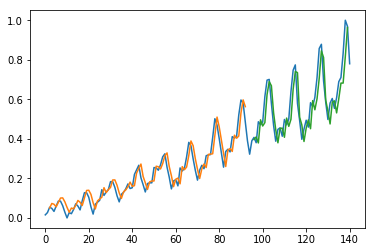

In [54]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()